In [217]:
# Import packages

import pandas as pd
import matplotlib.pyplot as plt

In [218]:
# Read file

with open('./hashcode-drone-delivery/busy_day.in','rt') as file:
    lines = file.readlines()
    for i in range(len(lines)):
        lines[i] = lines[i][:-1].split(' ')

In [219]:
# Convert data to int

for i in range(len(lines)):
    for j in range(len(lines[i])):
        lines[i][j] = int(lines[i][j])

In [220]:
# Read data

# PARAMETERS

N_ROWS = lines[0][0]
N_COLS = lines[0][1]
N_DRONES = lines[0][2]
DEADLINE = lines[0][3]
MAX_LOAD = lines[0][4]


# PRODUCT WEIGHTS

N_PRODUCT_TYPES = lines[1][0]
WEIGHTS = lines[2]


# WAREHOUSES

N_WAREHOUSES = lines[3][0]

del lines[:4]

WH_COORDS = []
WH_prods = []

for i in range(N_WAREHOUSES):
    WH_COORDS.append(lines[2*i])
    WH_prods.append(lines[2*i+1])

del lines[:N_WAREHOUSES*2]

# ORDERS

N_ORDERS = lines[0][0]

del lines[:1]

ORD_COORDS = []
ORD_ITEMS = []
ORD_TYPES = []

for i in range(N_ORDERS):
    ORD_COORDS.append(lines[3*i])
    ORD_ITEMS.append(lines[3*i+1])
    ORD_TYPES.append(lines[3*i+2])

In [312]:
# Dataframes

product = pd.DataFrame({'weight': WEIGHTS})

warehouse = pd.DataFrame(WH_COORDS, columns=['row','col'])
warehouse['products'] = WH_prods
warehouse = warehouse.join(pd.DataFrame(WH_prods))

order = pd.DataFrame(ORD_COORDS, columns=['row','col'])
order['items'] = ORD_ITEMS
order['items'] = order['items'].apply(lambda x: x[0])
order['products'] = ORD_TYPES
order['weight'] = 0
for i in range(len(order)):
    for prod in order.loc[i, 'products']:
        order.loc[i, 'weight'] += product.loc[prod, 'weight']
order['max_load'] = order['weight'] > MAX_LOAD

In [268]:
def nearest_wh(o, wh):
    """Find nearest warehouse to a product. Return index"""
    min_dist = (wh.loc[0,'row'] - o['row'])**2 + (wh.loc[0,'col'] - o['col'])**2
    nearest = 0
    for i in range(1, len(wh)):
        dist = (wh.loc[i,'row'] - o['row'])**2 + (wh.loc[i,'col'] - o['col'])**2
        if dist < min_dist:
            min_dist = dist
            nearest = i
    return nearest

In [270]:
order['nearest_wh'] = order.apply(lambda x: nearest_wh(x, warehouse), 1)

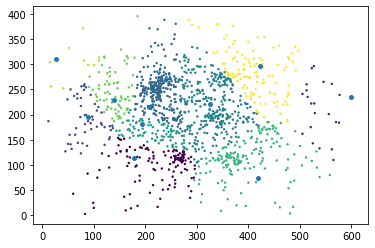

In [272]:
plt.scatter(x=order['col'], y=order['row'], c=order['nearest_wh'], s=2)
plt.scatter(x=warehouse['col'], y=warehouse['row'], s=15)